In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [ ]:
# Downloading necessary NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Import data
df = pd.read_csv('/content/gdrive/MyDrive/word frequency.csv')

In [ ]:
df.head()

,번호,제목,본문,english_text,채널,세부채널,시작 날짜,종료 날짜,url,정제데이터
0,1,3 정직하면 하늘이 복을 내려준다,"회사를 창업한 지 1년도 되지 안아, 나는 일을 배우기 위해 대만 싱가포르 홍콩 인...","Less than a year after starting the company, I...",daum,cafe,2021-01-01,2021-01-31,https://cafe.daum.net/59limfamily/TXnG/294?q=%...,NaN
1,2,오늘(1월 29일 금 음력 12월 17일 丁丑)의 운세,불안하고 여행은 손재가 예상되니 매사 신중히. 96년 때와 장소 따라 임기응변으로 ...,I'm anxious and traveling is expected to be di...,daum,cafe,2021-01-01,2021-01-31,https://cafe.daum.net/pkq48/76Zb/12812?q=%22%E...,NaN
2,3,1월28일 태국 코로나19소식 및 태국뉴스,"2명, 인도네시아에서 입국한 1명, 카타르에서 입국한 1명, 미국에서 입국한 5명입...","There are 2 people, 1 person from Indonesia, 1...",daum,cafe,2021-01-01,2021-01-31,https://cafe.daum.net/greenworldC.C/Mcfq/337?q...,NaN
3,4,세계 각국의 식사 Manner,해외여행도 자유롭지 못하고 외국인을 만나기도 쉽지 않다. 가끔은 해외의 식사예절을 ...,It is not free to travel abroad and it is not ...,daum,cafe,2021-01-01,2021-01-31,https://cafe.daum.net/kimposamnak/pOlx/629?q=%...,NaN
4,5,마감 합니다,218.인도네시아방한시트 5천원 219.aopu 1주년 6천원 220. 민속예능5집...,"218. Indonesia cold weather sheets 5,000 won 2...",daum,cafe,2021-01-01,2021-01-31,https://cafe.daum.net/stamp/9jsf/7093?q=%22%EC...,NaN


In [ ]:
# Checking missing values
df.isnull().sum().sort_values(ascending=False)

정제데이터           17288
본문                 25
english_text       25
제목                  2
번호                  0
채널                  0
세부채널                0
시작 날짜               0
종료 날짜               0
url                 0
dtype: int64

In [ ]:
df = df[['본문', 'english_text']]

In [ ]:
df

,본문,english_text
0,"회사를 창업한 지 1년도 되지 안아, 나는 일을 배우기 위해 대만 싱가포르 홍콩 인...","Less than a year after starting the company, I..."
1,불안하고 여행은 손재가 예상되니 매사 신중히. 96년 때와 장소 따라 임기응변으로 ...,I'm anxious and traveling is expected to be di...
2,"2명, 인도네시아에서 입국한 1명, 카타르에서 입국한 1명, 미국에서 입국한 5명입...","There are 2 people, 1 person from Indonesia, 1..."
3,해외여행도 자유롭지 못하고 외국인을 만나기도 쉽지 않다. 가끔은 해외의 식사예절을 ...,It is not free to travel abroad and it is not ...
4,218.인도네시아방한시트 5천원 219.aopu 1주년 6천원 220. 민속예능5집...,"218. Indonesia cold weather sheets 5,000 won 2..."
...,...,...
21502,여자친구와 함께 가족여행을 떠나려하는데 내돈 내산 첫 해외여행인지라 항공권 예매부터...,I'm planning to go on a family trip with my gi...
21503,- Ayar가 자기를 어떻게 알게됐는지 이야기하다 인도네시아 여행 커뮤니티 통해 알...,- Ayar was talking about how he got to know hi...
21504,인도네시아 최고의 숙박! ” Tepi Sungai에서의 숙박은 3주간의 인도네시아 ...,Best stay in Indonesia! ” Our stay at Tepi Sun...
21505,제가 인도네시아 여행하면서 새롭게 알게 된 사실이 있는데요. 태국을 제외한 동남아시...,There is something new I learned while traveli...


In [ ]:
df = df.dropna()

In [ ]:
df

,본문,english_text
0,"회사를 창업한 지 1년도 되지 안아, 나는 일을 배우기 위해 대만 싱가포르 홍콩 인...","Less than a year after starting the company, I..."
1,불안하고 여행은 손재가 예상되니 매사 신중히. 96년 때와 장소 따라 임기응변으로 ...,I'm anxious and traveling is expected to be di...
2,"2명, 인도네시아에서 입국한 1명, 카타르에서 입국한 1명, 미국에서 입국한 5명입...","There are 2 people, 1 person from Indonesia, 1..."
3,해외여행도 자유롭지 못하고 외국인을 만나기도 쉽지 않다. 가끔은 해외의 식사예절을 ...,It is not free to travel abroad and it is not ...
4,218.인도네시아방한시트 5천원 219.aopu 1주년 6천원 220. 민속예능5집...,"218. Indonesia cold weather sheets 5,000 won 2..."
...,...,...
21502,여자친구와 함께 가족여행을 떠나려하는데 내돈 내산 첫 해외여행인지라 항공권 예매부터...,I'm planning to go on a family trip with my gi...
21503,- Ayar가 자기를 어떻게 알게됐는지 이야기하다 인도네시아 여행 커뮤니티 통해 알...,- Ayar was talking about how he got to know hi...
21504,인도네시아 최고의 숙박! ” Tepi Sungai에서의 숙박은 3주간의 인도네시아 ...,Best stay in Indonesia! ” Our stay at Tepi Sun...
21505,제가 인도네시아 여행하면서 새롭게 알게 된 사실이 있는데요. 태국을 제외한 동남아시...,There is something new I learned while traveli...


In [ ]:
# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing
    tokens = [word.lower() for word in tokens]
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Removing punctuation
    tokens = [word for word in tokens if word.isalpha()]
    return ' '.join(tokens)

In [ ]:
# Applying preprocessing to the text data
df['processed_text'] = df['english_text'].apply(preprocess_text)

<ipython-input-13-f39b4817a55c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_text'] = df['english_text'].apply(preprocess_text)


In [ ]:
df.head()

,본문,english_text,processed_text
0,"회사를 창업한 지 1년도 되지 안아, 나는 일을 배우기 위해 대만 싱가포르 홍콩 인...","Less than a year after starting the company, I...",less year starting company traveled southeast ...
1,불안하고 여행은 손재가 예상되니 매사 신중히. 96년 때와 장소 따라 임기응변으로 ...,I'm anxious and traveling is expected to be di...,anxious traveling expected difficult careful e...
2,"2명, 인도네시아에서 입국한 1명, 카타르에서 입국한 1명, 미국에서 입국한 5명입...","There are 2 people, 1 person from Indonesia, 1...",people person indonesia person qatar people un...
3,해외여행도 자유롭지 못하고 외국인을 만나기도 쉽지 않다. 가끔은 해외의 식사예절을 ...,It is not free to travel abroad and it is not ...,free travel abroad easy meet foreigners someti...
4,218.인도네시아방한시트 5천원 219.aopu 1주년 6천원 220. 민속예능5집...,"218. Indonesia cold weather sheets 5,000 won 2...",indonesia cold weather sheets aopu anniversary...


In [ ]:
# Word Frequency Analysis
all_words = ' '.join(df['processed_text']).split()
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(20)

In [ ]:
# Displaying the most common words
print("Most Common Words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")


Most Common Words:
indonesia: 22114
travel: 17050
bali: 13198
trip: 7643
indonesian: 4393
time: 3985
also: 3340
people: 3314
korea: 3242
go: 3151
jakarta: 3090
traveling: 3081
like: 2898
first: 2719
countries: 2686
day: 2638
said: 2531
overseas: 2459
went: 2400
year: 2338


In [ ]:
# Fungsi untuk menghitung frekuensi kata kerja dalam teks
def count_verb_frequency(text):
    tokens = word_tokenize(text)
    # Lowercasing
    tokens = [word.lower() for word in tokens]
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Removing punctuation
    tokens = [word for word in tokens if word.isalpha()]
    pos_tags = pos_tag(tokens)
    verbs = [word for word, pos in pos_tags if pos.startswith('VB')]
    verb_freq = Counter(verbs)
    return verb_freq

In [ ]:
# Terapkan fungsi ke setiap baris dalam kolom 'text'
df['verb_frequencies'] = df['english_text'].apply(count_verb_frequency)

<ipython-input-52-5030c607cd0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['verb_frequencies'] = df['english_text'].apply(count_verb_frequency)


In [ ]:
# Gabungkan semua frekuensi kata kerja dari semua baris untuk visualisasi keseluruhan
combined_verb_freq = Counter()
for verb_freq in df['verb_frequencies']:
    combined_verb_freq.update(verb_freq)

In [ ]:
# Debugging: Cetak frekuensi gabungan dari kata kerja
print("Frekuensi gabungan kata kerja:", combined_verb_freq)

Frekuensi gabungan kata kerja: Counter({'traveling': 3043, 'go': 3026, 'said': 2531, 'went': 2400, 'travel': 2158, 'indonesia': 1991, 'including': 1726, 'bali': 1227, 'going': 1158, 'take': 974, 'think': 908, 'see': 881, 'want': 815, 'took': 790, 'korea': 772, 'made': 741, 'came': 739, 'get': 679, 'located': 668, 'decided': 662, 'looking': 647, 'held': 631, 'come': 624, 'traveled': 605, 'called': 589, 'used': 579, 'visited': 553, 'entering': 551, 'confirmed': 550, 'starting': 541, 'know': 529, 'make': 500, 'expected': 499, 'thailand': 486, 'living': 484, 'increased': 479, 'recommended': 475, 'left': 470, 'arrived': 438, 'planning': 437, 'say': 435, 'according': 434, 'announced': 433, 'wanted': 422, 'found': 420, 'visit': 412, 'thought': 406, 'started': 393, 'let': 390, 'using': 388, 'bought': 382, 'got': 382, 'like': 378, 'felt': 368, 'compared': 339, 'preparing': 339, 'taking': 338, 'eating': 337, 'find': 336, 'visiting': 330, 'ranked': 320, 'seems': 319, 'looked': 319, 'became': 317,

In [ ]:
# Generating a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

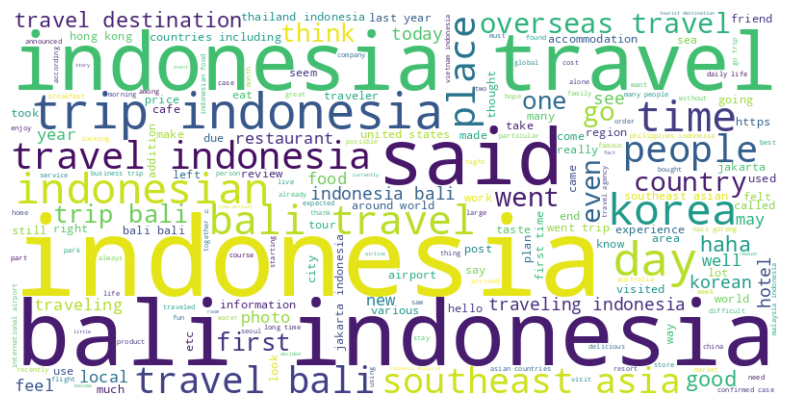

In [ ]:
# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Visualisasi menggunakan Word Cloud
wordcloud_verb = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(combined_verb_freq)

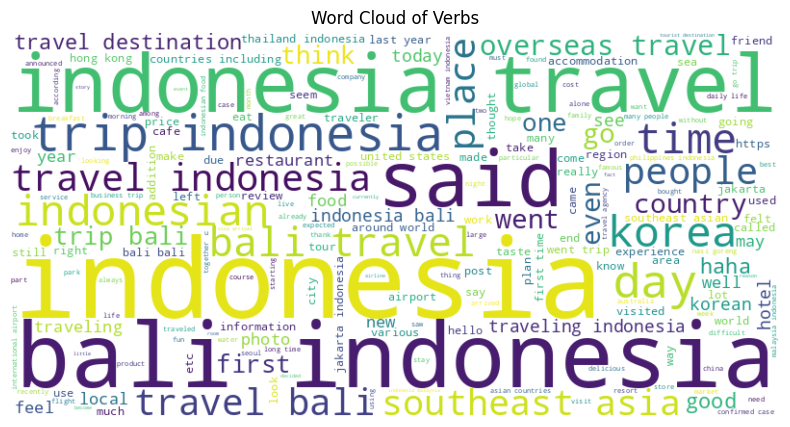

In [ ]:
# Tampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Verbs')
plt.show()

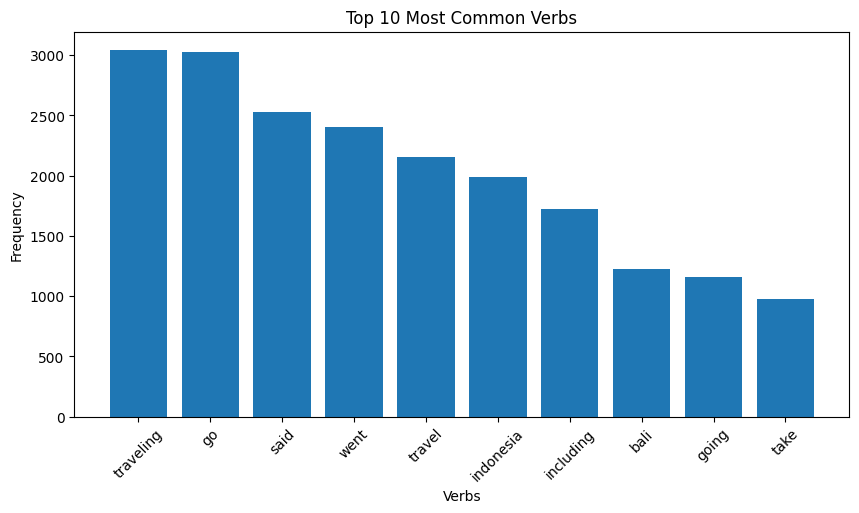

In [ ]:
# Visualisasi menggunakan Bar Plot
plt.figure(figsize=(10, 5))
most_common_verbs = combined_verb_freq.most_common(10)  # Ambil 10 kata kerja yang paling umum
verbs, counts = zip(*most_common_verbs)
plt.bar(verbs, counts)
plt.xlabel('Verbs')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Verbs')
plt.xticks(rotation=45)
plt.show()

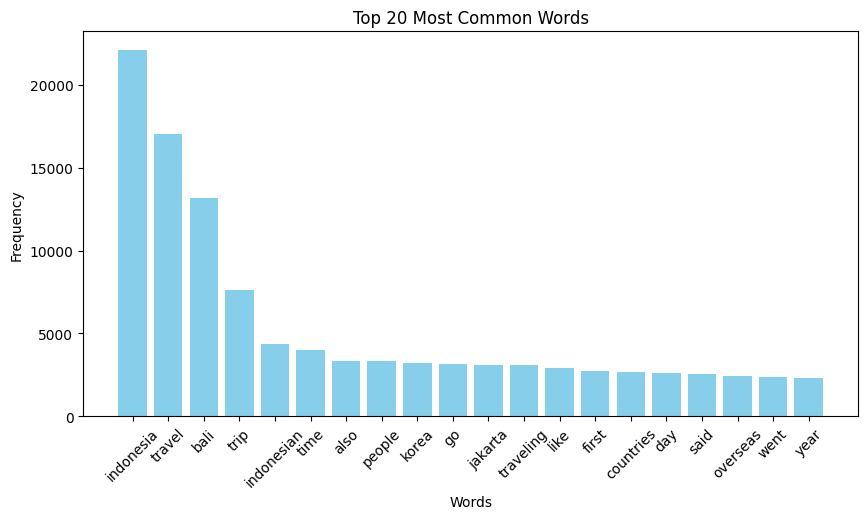

In [ ]:
# Plotting Word Frequency
top_n = 20  # Top N words to display
common_words_df = pd.DataFrame(most_common_words, columns=['word', 'frequency'])

plt.figure(figsize=(10, 5))
plt.bar(common_words_df['word'], common_words_df['frequency'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])

In [ ]:
# Clustering using K-means
num_clusters = 4  # Assuming two clusters for positive and negative sentiments
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-21-e2ce3859282a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(X)


In [ ]:
# Displaying cluster assignment
print("Cluster Assignment:")
print(df[['english_text', 'cluster']])


Cluster Assignment:
                                            english_text  cluster
0      Less than a year after starting the company, I...        1
1      I'm anxious and traveling is expected to be di...        0
2      There are 2 people, 1 person from Indonesia, 1...        1
3      It is not free to travel abroad and it is not ...        0
4      218. Indonesia cold weather sheets 5,000 won 2...        0
...                                                  ...      ...
21502  I'm planning to go on a family trip with my gi...        0
21503  - Ayar was talking about how he got to know hi...        0
21504  Best stay in Indonesia! ” Our stay at Tepi Sun...        0
21505  There is something new I learned while traveli...        0
21506  Source: Travel Talk Talk (tourtoctoc.com) Edit...        1

[21482 rows x 2 columns]


<ipython-input-23-0a17e41e9a3b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pca1'] = principalComponents[:, 0]
<ipython-input-23-0a17e41e9a3b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pca2'] = principalComponents[:, 1]


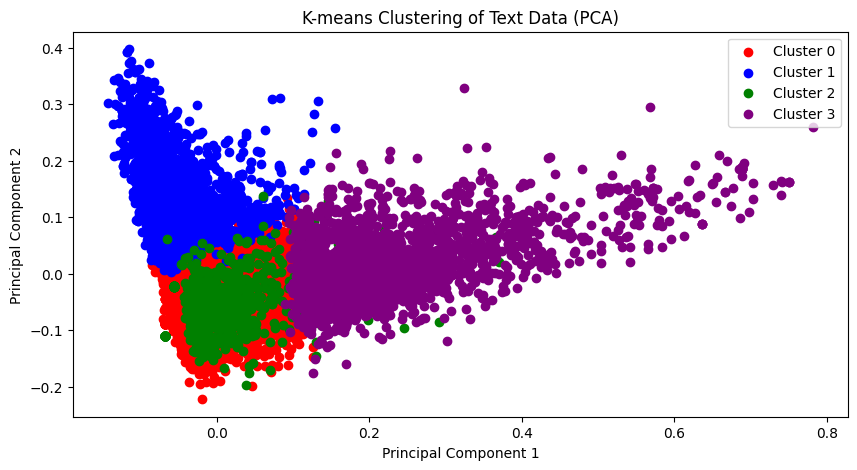

In [ ]:
# Plotting the clustering results (2D visualization with PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X.toarray())
df['pca1'] = principalComponents[:, 0]
df['pca2'] = principalComponents[:, 1]

plt.figure(figsize=(10, 5))
colors = ['red', 'blue', 'green', 'purple']
for i in range(num_clusters):
    cluster_points = df[df['cluster'] == i]
    plt.scatter(cluster_points['pca1'], cluster_points['pca2'], c=colors[i], label=f'Cluster {i}')
plt.title('K-means Clustering of Text Data (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
df['cluster'].value_counts()

cluster
0    14787
1     3710
3     2231
2      754
Name: count, dtype: int64

In [ ]:
df.head()

,본문,english_text,processed_text,cluster,pca1,pca2
0,"회사를 창업한 지 1년도 되지 안아, 나는 일을 배우기 위해 대만 싱가포르 홍콩 인...","Less than a year after starting the company, I...",less year starting company traveled southeast ...,1,-0.076628,0.036270
1,불안하고 여행은 손재가 예상되니 매사 신중히. 96년 때와 장소 따라 임기응변으로 ...,I'm anxious and traveling is expected to be di...,anxious traveling expected difficult careful e...,0,-0.053656,-0.035932
2,"2명, 인도네시아에서 입국한 1명, 카타르에서 입국한 1명, 미국에서 입국한 5명입...","There are 2 people, 1 person from Indonesia, 1...",people person indonesia person qatar people un...,1,-0.087597,0.079102
3,해외여행도 자유롭지 못하고 외국인을 만나기도 쉽지 않다. 가끔은 해외의 식사예절을 ...,It is not free to travel abroad and it is not ...,free travel abroad easy meet foreigners someti...,0,-0.054888,0.042015
4,218.인도네시아방한시트 5천원 219.aopu 1주년 6천원 220. 민속예능5집...,"218. Indonesia cold weather sheets 5,000 won 2...",indonesia cold weather sheets aopu anniversary...,0,-0.037997,-0.030858


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
Senti = SentimentIntensityAnalyzer()
sample_review = df['processed_text']
for sentence in sample_review:
    sentence
    ss = Senti.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]))
    print(sentence)



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Output streaming akan dipotong hingga 5000 baris terakhir.
compound: 0.807, 
neg: 0.06, 
neu: 0.694, 
pos: 0.246, 
independent travel gili trawangan get gili korean air special meal fruit meal vacation started october korean air special meal fruit meal first time company like traveling overseas really satisfied company making reservation trouble looking package details
compound: 0.8553, 
neg: 0.0, 
neu: 0.698, 
pos: 0.302, 
honeymoon finally arrived bali place looking forward brother prepared really cute toangjji doll topper hahahahahahahahahahahahahahahahahahahahahahahahahahahahahaha everyone goes trip takes pictures dolls focus good job please give jobs still
compound: 0.4019, 
neg: 0.0, 
neu: 0.924, 
pos: 0.076, 
global external activity hosted daesang group university students vietnam indonesia korea travel around world produce films together airline tickets vietnam indonesia accommodation travel expenses without spending penny apply travel around world support areas available
comp

In [ ]:
# Sentiment Intensity Analysis using VADER
sid = SentimentIntensityAnalyzer()
df['sentiment_scores'] = df['english_text'].apply(sid.polarity_scores)
df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >= 0 else 'negative')

<ipython-input-27-bc172f6ed594>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_scores'] = df['english_text'].apply(sid.polarity_scores)
<ipython-input-27-bc172f6ed594>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])
<ipython-input-27-bc172f6ed594>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [ ]:
print("Sentiment Analysis Results:")
print(df[['english_text', 'compound', 'sentiment']])

Sentiment Analysis Results:
                                            english_text  compound sentiment
0      Less than a year after starting the company, I...   -0.2732  negative
1      I'm anxious and traveling is expected to be di...    0.8632  positive
2      There are 2 people, 1 person from Indonesia, 1...   -0.8658  negative
3      It is not free to travel abroad and it is not ...   -0.6259  negative
4      218. Indonesia cold weather sheets 5,000 won 2...    0.9936  positive
...                                                  ...       ...       ...
21502  I'm planning to go on a family trip with my gi...   -0.1836  negative
21503  - Ayar was talking about how he got to know hi...    0.7351  positive
21504  Best stay in Indonesia! ” Our stay at Tepi Sun...    0.9544  positive
21505  There is something new I learned while traveli...   -0.7845  negative
21506  Source: Travel Talk Talk (tourtoctoc.com) Edit...    0.0000  positive

[21482 rows x 3 columns]


In [ ]:
df['sentiment'].value_counts()

sentiment
positive    17837
negative     3645
Name: count, dtype: int64

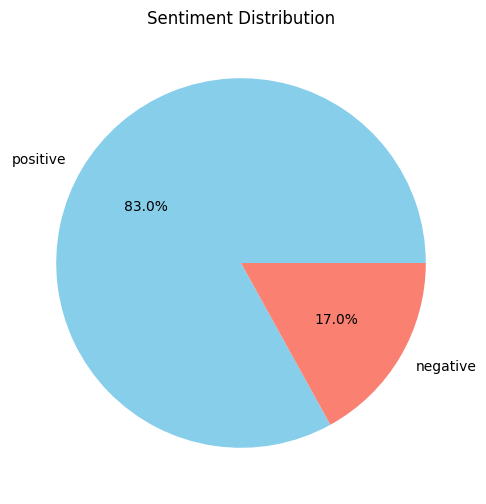

In [ ]:
# Sentiment Analysis Pie Chart
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
df.to_csv('sentiment_result.csv')

In [ ]:
df

,본문,english_text,processed_text,cluster,pca1,pca2,sentiment_scores,compound,sentiment
0,"회사를 창업한 지 1년도 되지 안아, 나는 일을 배우기 위해 대만 싱가포르 홍콩 인...","Less than a year after starting the company, I...",less year starting company traveled southeast ...,1,-0.076628,0.036270,"{'neg': 0.067, 'neu': 0.897, 'pos': 0.036, 'co...",-0.2732,negative
1,불안하고 여행은 손재가 예상되니 매사 신중히. 96년 때와 장소 따라 임기응변으로 ...,I'm anxious and traveling is expected to be di...,anxious traveling expected difficult careful e...,0,-0.053656,-0.035932,"{'neg': 0.078, 'neu': 0.754, 'pos': 0.168, 'co...",0.8632,positive
2,"2명, 인도네시아에서 입국한 1명, 카타르에서 입국한 1명, 미국에서 입국한 5명입...","There are 2 people, 1 person from Indonesia, 1...",people person indonesia person qatar people un...,1,-0.087597,0.079102,"{'neg': 0.169, 'neu': 0.777, 'pos': 0.054, 'co...",-0.8658,negative
3,해외여행도 자유롭지 못하고 외국인을 만나기도 쉽지 않다. 가끔은 해외의 식사예절을 ...,It is not free to travel abroad and it is not ...,free travel abroad easy meet foreigners someti...,0,-0.054888,0.042015,"{'neg': 0.076, 'neu': 0.924, 'pos': 0.0, 'comp...",-0.6259,negative
4,218.인도네시아방한시트 5천원 219.aopu 1주년 6천원 220. 민속예능5집...,"218. Indonesia cold weather sheets 5,000 won 2...",indonesia cold weather sheets aopu anniversary...,0,-0.037997,-0.030858,"{'neg': 0.0, 'neu': 0.579, 'pos': 0.421, 'comp...",0.9936,positive
...,...,...,...,...,...,...,...,...,...
21502,여자친구와 함께 가족여행을 떠나려하는데 내돈 내산 첫 해외여행인지라 항공권 예매부터...,I'm planning to go on a family trip with my gi...,planning go family trip girlfriend since first...,0,-0.004317,-0.029040,"{'neg': 0.046, 'neu': 0.916, 'pos': 0.038, 'co...",-0.1836,negative
21503,- Ayar가 자기를 어떻게 알게됐는지 이야기하다 인도네시아 여행 커뮤니티 통해 알...,- Ayar was talking about how he got to know hi...,ayar talking got know said got know indonesian...,0,-0.043810,-0.071818,"{'neg': 0.0, 'neu': 0.922, 'pos': 0.078, 'comp...",0.7351,positive
21504,인도네시아 최고의 숙박! ” Tepi Sungai에서의 숙박은 3주간의 인도네시아 ...,Best stay in Indonesia! ” Our stay at Tepi Sun...,best stay indonesia stay tepi sungai best week...,0,-0.025763,-0.085208,"{'neg': 0.048, 'neu': 0.675, 'pos': 0.277, 'co...",0.9544,positive
21505,제가 인도네시아 여행하면서 새롭게 알게 된 사실이 있는데요. 태국을 제외한 동남아시...,There is something new I learned while traveli...,something new learned traveling indonesia exce...,0,-0.067599,0.036420,"{'neg': 0.162, 'neu': 0.795, 'pos': 0.044, 'co...",-0.7845,negative
